In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cassandra.cluster import Cluster
import plotly.express as px

In [139]:
cluster = Cluster(['172.31.10.156', '172.31.10.119', '172.31.0.245','172.31.6.65','172.31.8.141'])
session = cluster.connect("nosql")

In [140]:
def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)
session.row_factory = pandas_factory
session.default_fetch_size = None

query = "SELECT * from requete1 limit 10"
rslt = session.execute(query, timeout=None)
df = rslt._current_rows
df.head

<bound method NDFrame.head of        jour pays langue  count
0  20190620         afr      5
1  20190620         ara    182
2  20190620         axe     37
3  20190620         ben      1
4  20190620         bos     52
5  20190620         bul     96
6  20190620         cat     41
7  20190620         ces     66
8  20190620         dan     81
9  20190620         deu    236>

In [141]:
import seaborn as sns; sns.set()

**Requête2**

In [142]:
def requete2(pays="UK", date = None, date_debut = None, date_fin = None, year = None, monthyear = None):
  
    if (date is not None):
        query ="SELECT * FROM requete2 WHERE country='"+pays+"' AND year="+ str(year) + " AND monthyear="+ str(monthyear) + " AND day=" + str(date)
        rslt = session.execute(query, timeout=None)
        df_requete2 = rslt._current_rows
        df_requete2 = df_requete2.drop(['year', 'monthyear', 'day', 'country'], axis = 1)
        df_requete2 = df_requete2.sort_values(by=['count'], ascending = False)
        df_requete2 = df_requete2[:10]
        
    elif ( (date_debut is not None) & (date_fin is not None) ):
        query ="SELECT * FROM requete2 WHERE country='"+pays+"' AND year="+ str(year) + " AND monthyear="+ str(monthyear) + " AND day <=" + str(date_fin) + " AND day >=" + str(date_debut)
        rslt = session.execute(query, timeout=None)
        df_requete2 = rslt._current_rows
        df_requete2 = df_requete2.drop(['year', 'monthyear', 'day', 'country'], axis = 1)
        df_requete2 = df_requete2.sort_values(by=['count'], ascending = False)
        df_requete2 = df_requete2[:10]   
        
    elif ( (year is not None) & (monthyear is not None) ):
        query ="SELECT * FROM requete2 WHERE country='"+pays+"' AND year="+ str(year) + " AND monthyear="+ str(monthyear) 
        df_requete2 = session.execute(query, timeout=None)
        rslt = session.execute(query, timeout=None)
        df_requete2 = rslt._current_rows
        df_requete2 = df_requete2.drop(['year', 'monthyear', 'day', 'country'], axis = 1)
        df_requete2 = df_requete2.sort_values(by=['count'], ascending = False)
        df_requete2 = df_requete2[:10]  
        
        
    # only the year is given
    elif (year is not None):
        query ="SELECT * FROM requete2 WHERE country='"+pays+"' AND year="+ str(year)
        rslt = session.execute(query, timeout=None)
        df_requete2 = rslt._current_rows
        df_requete2 = df_requete2.drop(['year', 'monthyear', 'day', 'country'], axis = 1)
        df_requete2 = df_requete2.sort_values(by=['count'], ascending = False)
        df_requete2 = df_requete2[:10]  
        
    return df_requete2

In [143]:
def plot_bar_chart(df):
            #plot
        plt.figure(figsize=(15,5))
        df.plot.barh()
       # plt.title(f"Requête 2 effectuée pour la journée du {date}", weight = 'bold').set_fontsize(20)
        plt.title("Evènements qui y ont eu place triées par le nombre de mentions", weight = 'bold').set_fontsize(20)
        plt.ylabel("EventID", weight = 'bold').set_fontsize(14)
        plt.xlabel('Count', weight = 'bold').set_fontsize(14)
        plt.autoscale()

In [144]:
def plot_bar_chart_plotly(df, country, date):
    df['eventid']=  '¤'+df['eventid'].astype(str) 
    fig = px.bar(df, x='count', y='eventid',orientation='h',text='count',title="Evénements qui y ont eu lieu triés par le nombre de mentions au/en : " +country + " en/le: "+ date)
    fig.show()

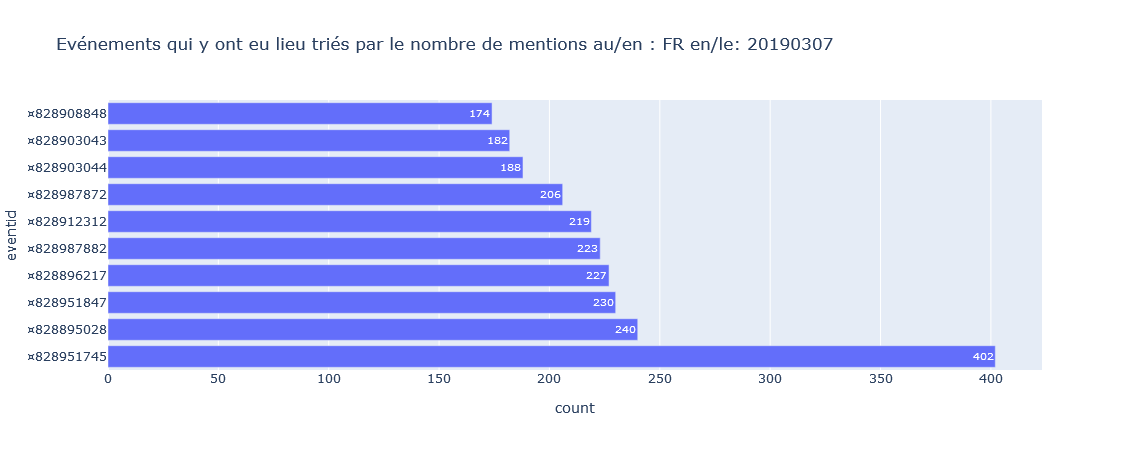

In [145]:
country= "FR"
date = '20190307'
a = requete2(country, year= date[:4], monthyear= date[:6], date= date)
plot_bar_chart_plotly(a, country, date)

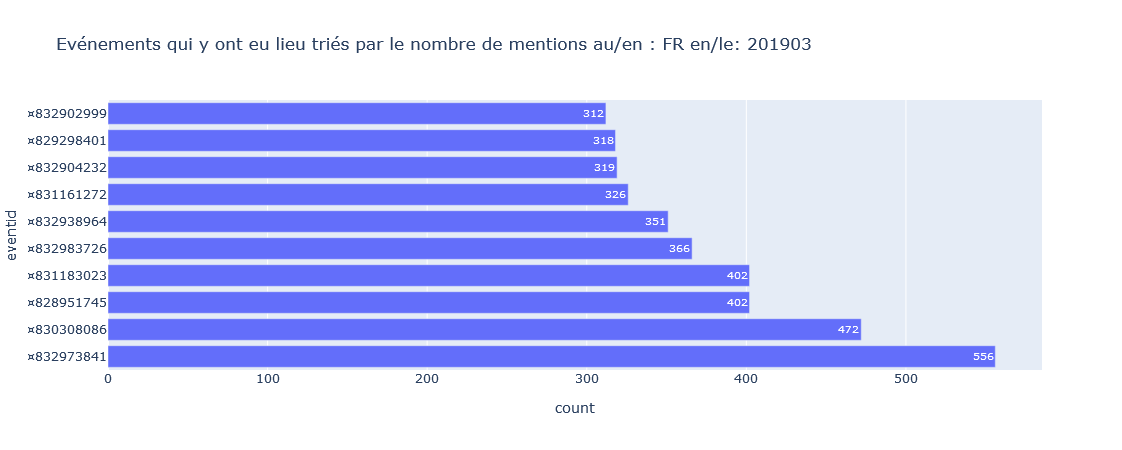

In [146]:
date = '201903'
a = requete2(country, year= date[:4], monthyear= date[:6])
plot_bar_chart_plotly(a, country, date)

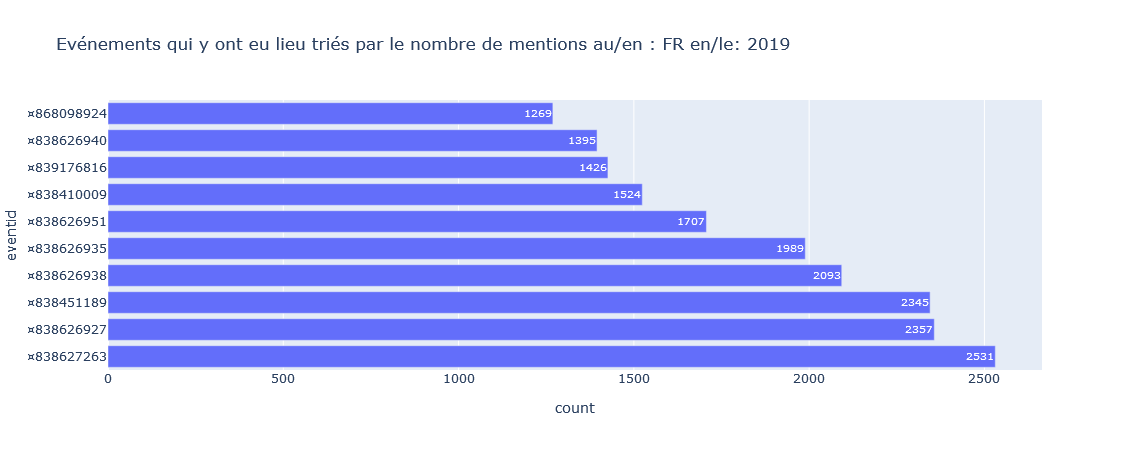

In [147]:
date = '2019'
a = requete2('FR', year= '2019')
plot_bar_chart_plotly(a, country, date)

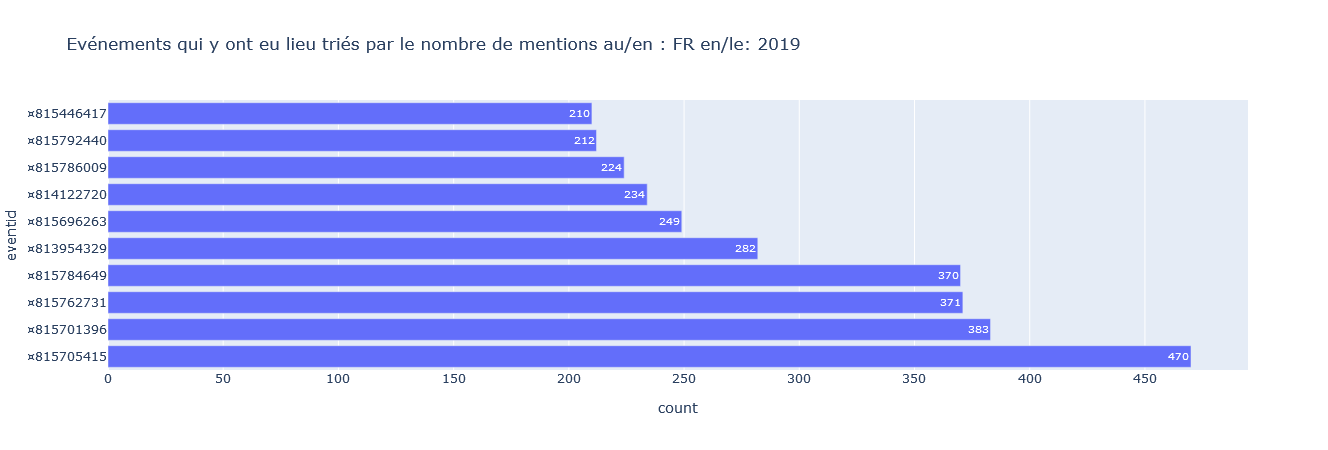

In [137]:
# Requête 2 sur 1 période entre date_debut et date_fin
b = requete2(pays = country, year=2019, monthyear=201901, date_debut= '20190103', date_fin = '20190118')
plot_bar_chart_plotly(b, country, date)

### Requete 4

In [121]:

import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
import country_converter as coco
init_notebook_mode(connected=True)

In [122]:
def pandas_factory(colnames, rows):
    return pd.DataFrame(rows, columns=colnames)
session.row_factory = pandas_factory
session.default_fetch_size = None

query = "SELECT * from req41 limit 10"
rslt = session.execute(query, timeout=None)
df = rslt._current_rows
df.head

<bound method NDFrame.head of   pays1  year  monthyear       day pays2  averagetone  numberofarticles
0    JE  2019     201912  20191231    FR    -4.000000                 1
1    JE  2019     201912  20191231    JE    -4.777778                55
2    JE  2019     201912  20191231    KN     0.000000                 1
3    JE  2019     201912  20191231    US    -4.750000                12
4    JE  2019     201912  20191230    CA    -4.000000                 8
5    JE  2019     201912  20191230    EI     3.000000                 2
6    JE  2019     201912  20191230    FR    -4.000000                 1
7    JE  2019     201912  20191230    GK    -2.000000                 4
8    JE  2019     201912  20191230    IS   -12.000000                 2
9    JE  2019     201912  20191230    JE    -5.423729               100>

In [148]:
def requete4(country="UK", year=None, monthyear=None, day=None):
    if(day is not None):
        query = "SELECT * FROM req41 WHERE pays1='" + country + "' AND year=" +str(year) + " AND monthyear=" + str(monthyear) + " AND day" + str(day)
        rslt = session.execute(query, timeout=None)
        df = rslt._current_rows
    elif(year is not None and monthyear is not None):
        query = "SELECT * FROM req41 WHERE pays1='" + country + "' AND year=" +str(year) + " AND monthyear=" + str(monthyear) 
        rslt = session.execute(query, timeout=None)
        df = rslt._current_rows
        df = df.groupby(["pays1", "pays2","year", "monthyear"]).agg({"averagetone": "sum", "numberofarticles": "sum"}).reset_index()
    elif(year is not None):
        query = "SELECT * FROM req41 WHERE pays1='" + country + "' AND year=" +str(year) 
        rslt = session.execute(query, timeout=None)
        df = rslt._current_rows
        df = df.groupby(["pays1", "pays2", "year"]).agg({"averagetone": "sum", "numberofarticles": "sum"}).reset_index()
    else:
        query = "SELECT * FROM req41 WHERE pays1='" + country +"'"
        rslt = session.execute(query, timeout=None)
        df = rslt._current_rows
        df = df.groupby(["pays1", "pays2"]).agg({"averagetone": "sum", "numberofarticles": "sum"}).reset_index()
    df['avgtone'] =df['averagetone']/df['numberofarticles']
    df = df.drop(['averagetone'], axis=1)
    df['country_code_iso3'] = coco.convert(names=df['pays2'].values.tolist(), to='ISO3', not_found=None)
    df['country_name'] = coco.convert(names=df['pays2'].values.tolist(), to='name_short', not_found=None)
    
    
    return df

In [150]:
df = requete4("UK", "2019")
df_use = df[df.pays1 != df.country_code_iso3]

In [151]:
def map_choropleth(df, title):
    return go.Choropleth(
        locations=df['country_code_iso3'], # Spatial coordinates
        z = df['value'].astype(float), # Data to be color-coded
        colorscale = 'Hot',
        reversescale=True,
        autocolorscale=False,
        text=df['country_name'] ,
        marker = go.choropleth.Marker(
        line = go.choropleth.marker.Line(
        color = 'rgb(180,180,180)',
        width = 0.5)),
       # colorbar_title = "Value",
)

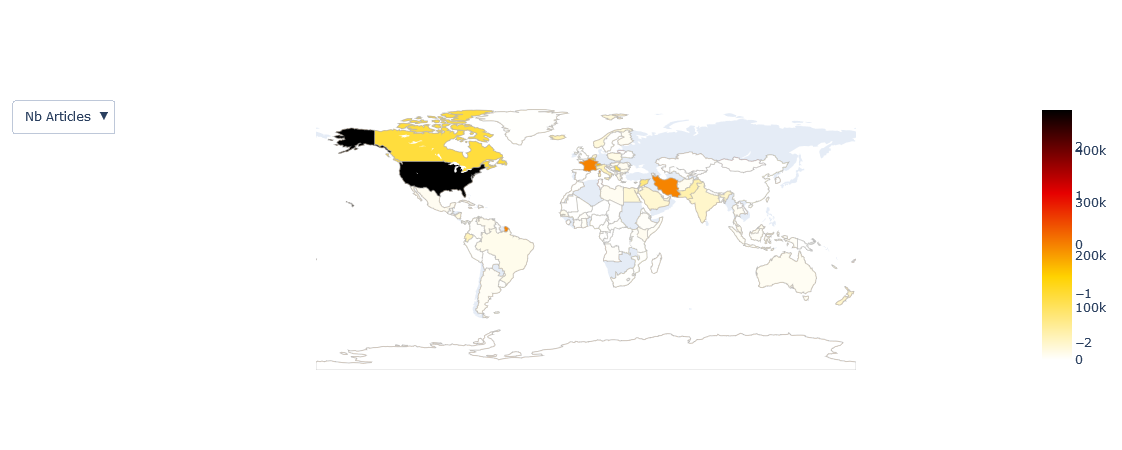

In [152]:
data = [ map_choropleth(df_use.rename(columns={'avgtone': 'value'}), 'test'), 
        map_choropleth(df_use.rename(columns={'numberofarticles': 'value'}), 'test2')]

updatemenus=list([
    dict(
    active=1,
    buttons=list([
        dict(
            args=[{'visible': [True, False]},
                 {'title': 'Ton moyen'}],
            label = "Avg tone",
            method='update'),
        dict(
            args=[{'visible': [False, True]},
                 {'title': 'Nombre d\'articles'}],
            label = "Nb Articles",
            method='update'),
    ]))
])
layout = go.Layout(
    geo = go.layout.Geo(
        showframe=False,
        showcoastlines=False,
        projection=go.layout.geo.Projection(
        type='equirectangular')
    ),
    updatemenus=updatemenus
)


fig = dict(data=data, layout=layout)
py.offline.iplot(fig)

In [125]:
!jupyter labextension list

JupyterLab v1.2.0
Known labextensions:
   app dir: /opt/conda/share/jupyter/lab
        @jupyter-widgets/jupyterlab-manager v1.1.0  enabled  OK
        jupyterlab-plotly v1.5.0  enabled  OK
        jupyterlab_bokeh v1.0.0  enabled  OK
        plotlywidget v1.5.0  enabled  OK

Build recommended, please run `jupyter lab build`:
    jupyterlab_bokeh needs to be included in build
    @jupyter-widgets/jupyterlab-manager needs to be included in build
    plotlywidget needs to be included in build
    jupyterlab-plotly needs to be included in build


In [10]:
!jupyter lab build

[LabBuildApp] JupyterLab 1.2.0
[LabBuildApp] Building in /opt/conda/share/jupyter/lab
[LabBuildApp] Building jupyterlab assets (build:prod:minimize)
